In [35]:
from astropy.io import fits
import matplotlib.pyplot as plt 
import numpy as np

In [36]:
hdulist = fits.open("/content/drive/MyDrive/gll_iem_v02_P6_V11_DIFFUSE.fit")
hdulist

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f089c0b8910>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f089bbfce50>]

In [37]:
hdulist.info()

Filename: /content/drive/MyDrive/gll_iem_v02_P6_V11_DIFFUSE.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (720, 360, 30)   float32   
  1  ENERGIES      1 BinTableHDU     19   30R x 1C   [D]   


In [42]:
#since there are HDU corresponding to only 0 and 1 the number of HDU's is 2
print("number of HDU's is 2")

number of HDU's is 2


In [47]:
hdu = hdulist[0]
hdu;

In [48]:
hdu.header

SIMPLE  =                    T / Written by IDL:  Thu Jan 20 07:19:05 2011      
BITPIX  =                  -32 /                                                
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                  720 / length of data axis 1                          
NAXIS2  =                  360 / length of data axis 2                          
NAXIS3  =                   30 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
FLUX    =        8.42259635886 /                                                
CRVAL1  =                   0. / Value of longitude in pixel CRPIX1             
CDELT1  =                  0.5 / Step size in longitude                         
CRPIX1  =                360

In [49]:
anslist = [hdu.header[5],hdu.header[23],hdu.header[24],hdu.header[29],hdu.header[32]]
print(anslist)

[30, 'photon energy', 'MeV', 'GLAST', 'MICHELSON']


In [50]:
img = hdu.data
img

array([[[1.20141934e-07, 1.19992990e-07, 1.19992990e-07, ...,
         1.17146094e-07, 1.17146094e-07, 1.17242180e-07],
        [1.26873346e-07, 1.26873346e-07, 1.26829207e-07, ...,
         1.24251599e-07, 1.24325553e-07, 1.24325553e-07],
        [1.31679627e-07, 1.31590227e-07, 1.31542834e-07, ...,
         1.34925770e-07, 1.34955656e-07, 1.35187406e-07],
        ...,
        [1.14278869e-07, 1.14215226e-07, 1.14194677e-07, ...,
         1.09027361e-07, 1.09093030e-07, 1.09137709e-07],
        [1.12280688e-07, 1.12280688e-07, 1.12276986e-07, ...,
         1.09685772e-07, 1.09658203e-07, 1.09658203e-07],
        [1.09558805e-07, 1.09467798e-07, 1.09467798e-07, ...,
         1.09205502e-07, 1.09205502e-07, 1.09279974e-07]],

       [[7.89390882e-08, 7.88358321e-08, 7.88358321e-08, ...,
         7.67633708e-08, 7.67633708e-08, 7.68264741e-08],
        [8.37779766e-08, 8.37779766e-08, 8.37445597e-08, ...,
         8.17242594e-08, 8.17777632e-08, 8.17777632e-08],
        [8.73966570e-08, 

In [52]:
import numpy as np
maxi = np.max(hdu.data[0])
mini = np.min(hdu.data[0])
sd = np.std(hdu.data[0])
print("maximum =",maxi,"minimum =",mini,"standarddeviation =",sd)

maximum = 4.5921523e-05 minimum = 7.027717e-08 standarddeviation = 1.3843595e-06


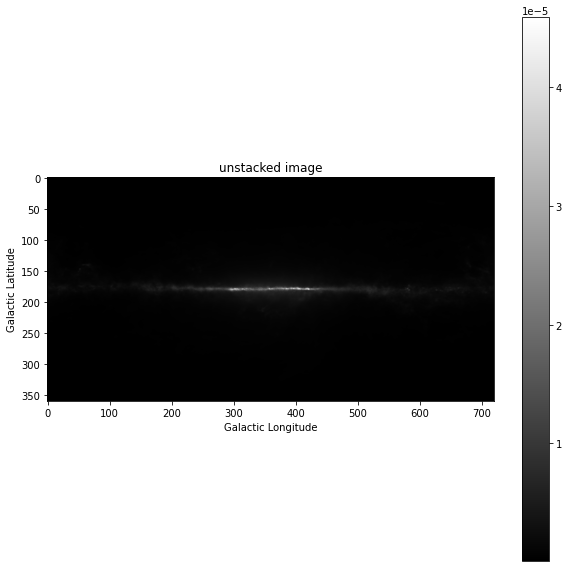

In [62]:
plt.figure(figsize=(10,10))
plt.imshow(hdu.data[0],cmap = 'gray', vmin = 7.027717e-08 , vmax = 4.5921523e-05 )
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')
plt.colorbar()
plt.title('unstacked image');

In [54]:
stacked_img = 0
for i in range(4,30,5):
  stacked_img += hdu.data[i]

In [55]:
min1 = np.min(stacked_img)
max1 = np.max(stacked_img)
sd1 = np.std(stacked_img)
print("maximum =",max1,"minimum =",min1,"standarddeviation =",sd1)

maximum = 1.0907543e-05 minimum = 1.2774165e-08 standarddeviation = 3.5807247e-07


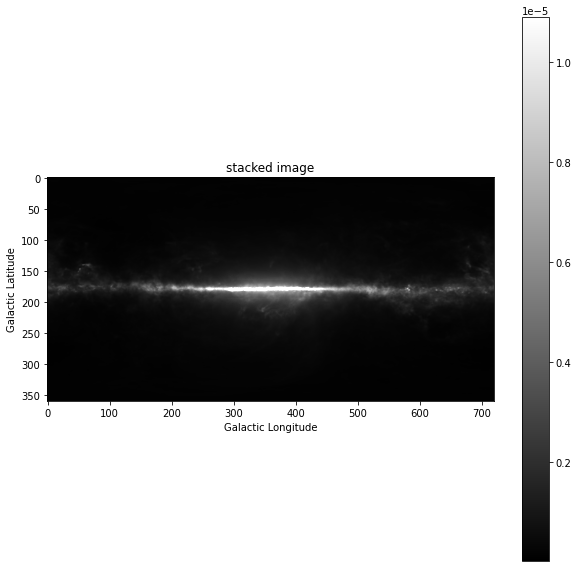

In [63]:
plt.figure(figsize=(10,10))
plt.imshow(hdu.data[0],cmap = 'gray', vmin = 1.2774165e-08  , vmax = 1.0907543e-05  )
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')
plt.colorbar()
plt.title('stacked image');

In [57]:
from astropy import units as u
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time

In [58]:
def futalt(coord , time ) :
    IITM = EarthLocation(lat=12.992*u.deg, lon=80.234*u.deg, height=50*u.m)
    input_time = Time(time) - 5.5*u.hour
    fut_time = input_time + 12*u.hour
    new_coord = coord.transform_to(AltAz(obstime = fut_time , location = IITM))
    return new_coord.alt

In [61]:
a = futalt(SkyCoord(12.11*u.deg, 85.26*u.deg), '2021-7-11 22:00:00')
print(a)

14d53m09.859s
